In [52]:
import numpy as np
import scipy.stats as st
import skimage.transform
import matplotlib.pyplot as plt
import cv2
import scipy
import sklearn

def single_half_disk(radius):
    two_r_plus_1 = radius*2 + 1
    half_disk = np.ones([two_r_plus_1, two_r_plus_1])

    rs = np.power(radius,2)
    for i in range(radius):
        iss = np.power((i - radius),2)
        
        for j in range(two_r_plus_1):
            if (iss+ np.power((j - radius),2) < rs):
                half_disk[i, j] = 0
    return half_disk

def half_disk_bank(radius_list,orient):
    orients=np.linspace(0,360,orient)
    orients = orients[:-1]
    half_disk_bank_op = list()
    for each_rad in radius_list:
        one_half_disk=single_half_disk(each_rad)
        for eachOrient in orients:
            image=skimage.transform.rotate(one_half_disk,eachOrient,cval=1)
            image_rotated=skimage.transform.rotate(one_half_disk,eachOrient+180,cval=1)
            image = np.round(image)
            image_rotated = np.round(image_rotated)
            half_disk_bank_op.append(image_rotated)
            half_disk_bank_op.append(image)
            
    return half_disk_bank_op

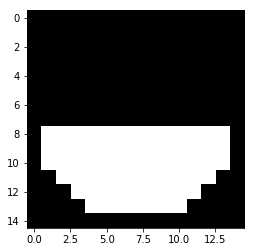

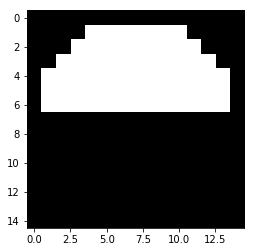

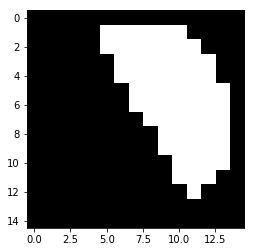

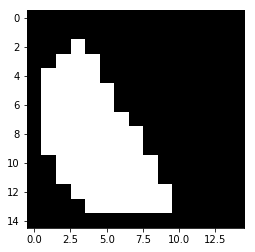

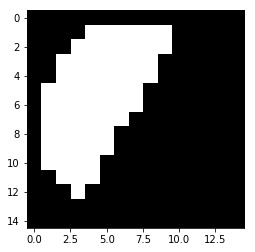

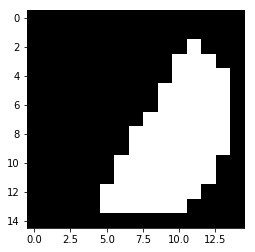

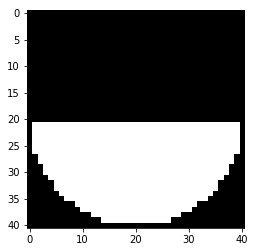

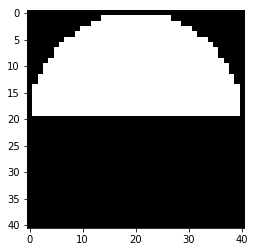

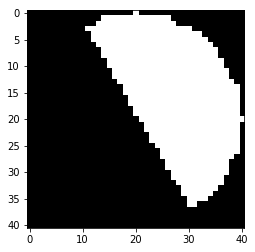

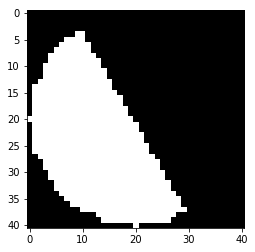

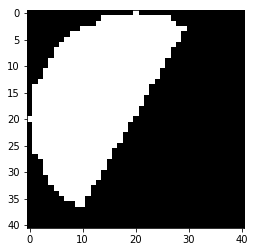

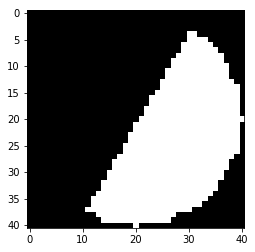

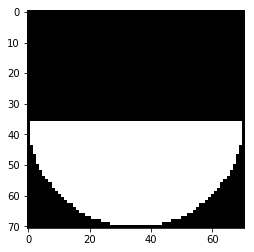

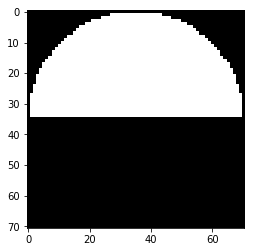

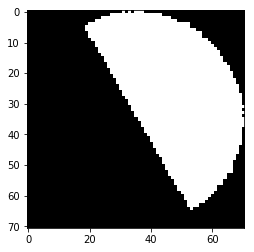

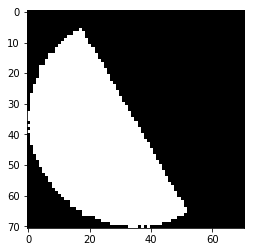

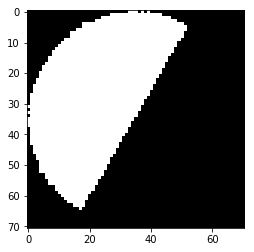

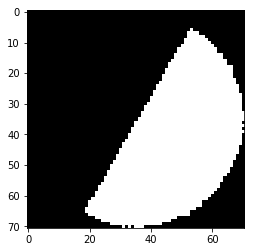

In [53]:
radius_list = [7,20,35]
orient = 4
half_disk = half_disk_bank(radius_list,orient)
for each in half_disk:
    plt.imshow(each,cmap='binary')
    plt.show()

In [90]:
orients=np.linspace(0,360,4) 
orients = orients[:-1]
orients

array([  0., 120., 240.])

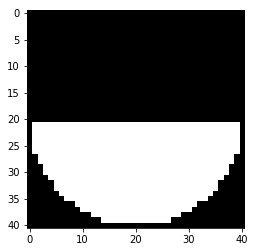

In [123]:
plt.imshow(half_disk[6],cmap='binary')
plt.show()

In [180]:
def calculate_chi_square(img,num_bins,left_mask,right_mask):
    chi_sqr_dist = img*0
    for i in range(num_bins):
        tmp = img       #1 where img is in bin i and 0 elsewhere
        mask = np.ma.masked_where(tmp==i , tmp)
        mask = mask.astype(np.int)
        g_i = cv2.filter2D(mask,-1,left_mask)	#convolve tmp with left_mask
        h_i = cv2.filter2D(mask,-1,right_mask)	#convolve tmp with right_mask
        term = (0.5)*(np.power((g_i-h_i),2)/(g_i+h_i))
        chi_sqr_dist = chi_sqr_dist + term
    return chi_sqr_dist

In [185]:
# img = cv2.imread('/home/pratique/Downloads/cmsc733/Homework0/116353601_hw0/Phase1/BSDS500/Images/1.jpg',0)
# chi_sq = calculate_chi_square(img,255,half_disk[0],half_disk[1])
# plt.imshow(chi_sq)#,cmap='binary')
# plt.show()

In [187]:
def calculate_Tg(img,num_bins,half_disk_filter_bank):
    img_chi_tensor=img
    for i in range(half_disk_filter_bank):
        left_mask = half_disk_filter_bank[i]
        right_mask = half_disk_filter_bank[i+1]
        chi_sqr_dist = calculate_chi_square(img=img,num_bins=num_bins,left_mask=left_mask,right_mask=right_mask)
        img_chi_tensor = np.dstack((img_chi_tensor,chi_sqr_dist))
    return